# Sales Product Analysis

## Description
This project is dedicated to organizing and analyzing information about product sales analysis to identify trends and generate insights. This project includes an analysis of the top-performing and underperforming products or services, areas, or states with the top sales. Data cleaning are performed using Python, Jupyter Notebooks, and Pandas library.

## Data Overview
Sales Product Data from [Kaggle dataset](https://www.kaggle.com/datasets/knightbearr/sales-product-data?resource=download&select=Sales_September_2019.csv) is used in this analysis. It has 6 fields, such as OrderID, Product, Quantity, Price, Order Data, and Purchase Address, with around 180,000 observations that span 12 months in the year of 2019.

## Research Questions
1. What was the total orders and total sales by month?
    - What was the best month for sales?
    - What is the best time to display advertisements to maximize the customers' purchase?
2. What area (state or city) with the highest number of sales?
    - Which product was the most popular in the state or city with the highest sales?
3. What product with the highest overall number of order? 
    - What products are most often sold together?

## Setup and Data Preparation

### Import packages and dataset

In [240]:
# Import packages
import pandas as pd
import numpy as np
import os
import glob
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from datetime import datetime

pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

In [241]:
# Read all 12 months dataset

# Read sample data
df = pd.read_csv("./Raw Data/01_Sales_January_2019.csv")
# df.head()

# Append all 12 months data
all_files = glob.glob("./Raw Data/*.csv", recursive=True)

all_data = []

for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0)
    all_data.append(df)

df_raw = pd.concat(all_data, axis=0)

# Save all data to new csv files
df_raw.to_csv("all_months_data.csv", index=False)

In [242]:
# Import newly appended dataset and provide dataset overview
data_name = "./all_months_data.csv"

df_raw = pd.read_csv(data_name)
df_raw.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [243]:
# Print the shape of main dataset
print("Dataset shape:", df_raw.shape)
print('Number of columns :', df_raw.shape[1])
print('Number of records :', df_raw.shape[0], '\n')

print(df_raw.dtypes, '\n')

# Print the column values in the dataframe
print("Column names:")
print(list(df_raw.columns.values))

Dataset shape: (186850, 6)
Number of columns : 6
Number of records : 186850 

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object 

Column names:
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']


### Data Cleaning
This step includes checking missing and duplicate values and changing datatype.

In [244]:
# Check missing values
missing_val = pd.DataFrame(df_raw.isnull().sum())
missing_val.columns = ["missing_count"]
missing_val

,missing_count
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [245]:
# Drop missing values and recheck
df_raw.dropna(inplace=True)

df_raw.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [246]:
# Check duplicate values
duplicateRows = df_raw[df_raw.duplicated()]
print("Number of duplicate rows: " + str(len(duplicateRows)))

Number of duplicate rows: 618


In [247]:
# Remove duplicate rows and header values
df_raw.drop_duplicates(inplace=True)

df = df_raw[df_raw["Order ID"] != "Order ID"]

Change current datatypes:
- Order ID: integer
- Quantity Ordered: integer
- Price Each: float
- Order Date: date

In [248]:
# Change datatypes
df["Order ID"] = pd.to_numeric(df["Order ID"])
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Order Date"] = pd.to_datetime(df['Order Date'])

### Data Transformation
This step includes extracting month and year from Order Date, calculating sales (price * qty), as well as adding city and states columns.

Task 1: Extracting month and year from 'Order Date' column

In [249]:
# Extract month and year from Order Date
df['month'] = df['Order Date'].dt.month
df['month_name'] = df['Order Date'].dt.strftime('%b')
df['year'] = df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.strftime('%Y-%m')

Task 2: Extracting hour and minute from 'Order Date' column

In [250]:
# Extract hour and minute from Order Date
df['hour'] = df['Order Date'].dt.hour
df['minute'] = df['Order Date'].dt.minute

Task 3: Calculating sales column (price * qty)

In [251]:
# Create new columns for total sales
df['sales'] = df['Quantity Ordered'] * df['Price Each']

Task 4: Adding city and states column

In [252]:
# Create function "get_city" to extract city and "get_states" to extract states from 'Purchase Address' column
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    first_split = address.split(',')[2]
    return first_split.split(' ')[1]

# Add city and state columns
df['city'] = df['Purchase Address'].apply(lambda x: get_city(x))
df['state'] = df['Purchase Address'].apply(lambda x: get_state(x))

# Concat city and state columns
df['city_state'] = df['city'] + ", " + df['state']

## Data Exploration
### Descriptive Statistics

In [253]:
df.describe()

,Order ID,Quantity Ordered,Price Each,month,year,hour,minute,sales
count,185686.000,185686.000,185686.000,185686.000,185686.000,185686.000,185686.000,185686.000
mean,230411.376,1.125,184.519,7.059,2019.000,14.413,29.481,185.612
std,51511.717,0.443,332.844,3.503,0.014,5.423,17.318,333.032
min,141234.000,1.000,2.990,1.000,2019.000,0.000,0.000,2.990
25%,185833.250,1.000,11.950,4.000,2019.000,11.000,14.000,11.950
50%,230354.500,1.000,14.950,7.000,2019.000,15.000,29.000,14.950
75%,275028.750,1.000,150.000,10.000,2019.000,19.000,45.000,150.000
max,319670.000,9.000,1700.000,12.000,2020.000,23.000,59.000,3400.000


## Analysis

#### Number of orders and sales by month

In [254]:
# Calculate total number of orders and sales by month
monthly_data = df.groupby(by=['year_month'], as_index=False).agg(
    total_order = ('Order ID', pd.Series.nunique),
    total_sales = ('sales', sum),
    
)

monthly_data

,year_month,total_order,total_sales
0,2019-01,9262,1812742.870
1,2019-02,11496,2200078.080
2,2019-03,14549,2804973.350
3,2019-04,17528,3389217.980
4,2019-05,15836,3150616.230
5,2019-06,12989,2576280.150
6,2019-07,13761,2646461.320
7,2019-08,11484,2241083.370
8,2019-09,11202,2094465.690
9,2019-10,19436,3734777.860


Text(-0.3, 2871405.6375000007, 'mean = 2,871,406')

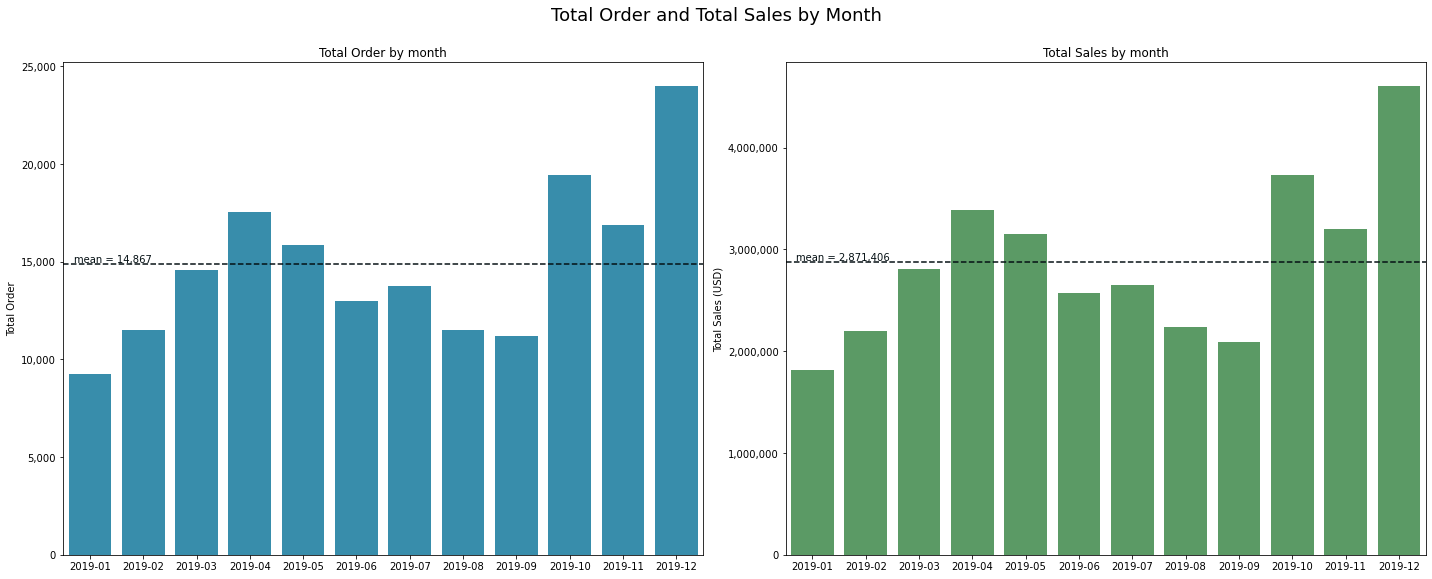

In [255]:
# Create bar chart for total order and total sales by month

# Remove 2020-01 data since it only has small observations
sub_monthly_data = monthly_data[monthly_data['year_month'] != '2020-01']

# Define subplot grid
fig, (ax0, ax1) = plt.subplots(1,2, figsize = [20,8], sharex=False)
fig.tight_layout()
fig.set_tight_layout(True)
fig.suptitle("Total Order and Total Sales by Month", fontsize=18, y=1)
fig.subplots_adjust(top=1.5, hspace=.5, wspace=.5)

# Total order by month
sns.barplot(data = sub_monthly_data, x = 'year_month', y = 'total_order', ax = ax0, color="#2596be")
ylab = ax0.set_ylabel('Total Order')
xlab = ax0.set_xlabel(None)
ax0.set_title('Total Order by month')
ax0.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax0.axhline(sub_monthly_data['total_order'].mean(), color = "#040f13", linestyle='--', label = "mean")
ax0.annotate('mean = ' + str(format(sub_monthly_data['total_order'].mean(), ',.0f')), xy = (ax0.get_xlim()[0]+0.2, sub_monthly_data['total_order'].mean()), ha = "left", va="bottom", color = "#040f13")

# Total sales by month
sns.barplot(data = sub_monthly_data, x = 'year_month', y = 'total_sales', ax = ax1, color="#50a45e")
ylab = ax1.set_ylabel('Total Sales (USD)')
xlab = ax1.set_xlabel(None)
ax1.set_title('Total Sales by month')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.axhline(sub_monthly_data['total_sales'].mean(), color = "#040f13", linestyle='--', label = "mean")
ax1.annotate('mean = ' + str(format(sub_monthly_data['total_sales'].mean(), ',.0f')), xy = (ax0.get_xlim()[0]+0.2, sub_monthly_data['total_sales'].mean()), ha = "left", va="bottom", color = "#040f13")


### Best time to place product advertisements

In [256]:
# Calculate total number of sales by hour
hour_data = df_sub.groupby(by=['hour'], as_index=False).agg(
    total_order = ('Order ID', pd.Series.nunique),
    total_sales = ('sales', sum),
    
)

hour_data.sort_values('hour', ascending=True).head()

,hour,total_order,total_sales
0,0,3748,710887.980
1,1,2246,458258.990
2,2,1192,232574.510
3,3,801,144683.040
4,4,810,162281.150


Text(-0.5500000000000002, 1435702.8187499999, 'mean = 1,435,703')

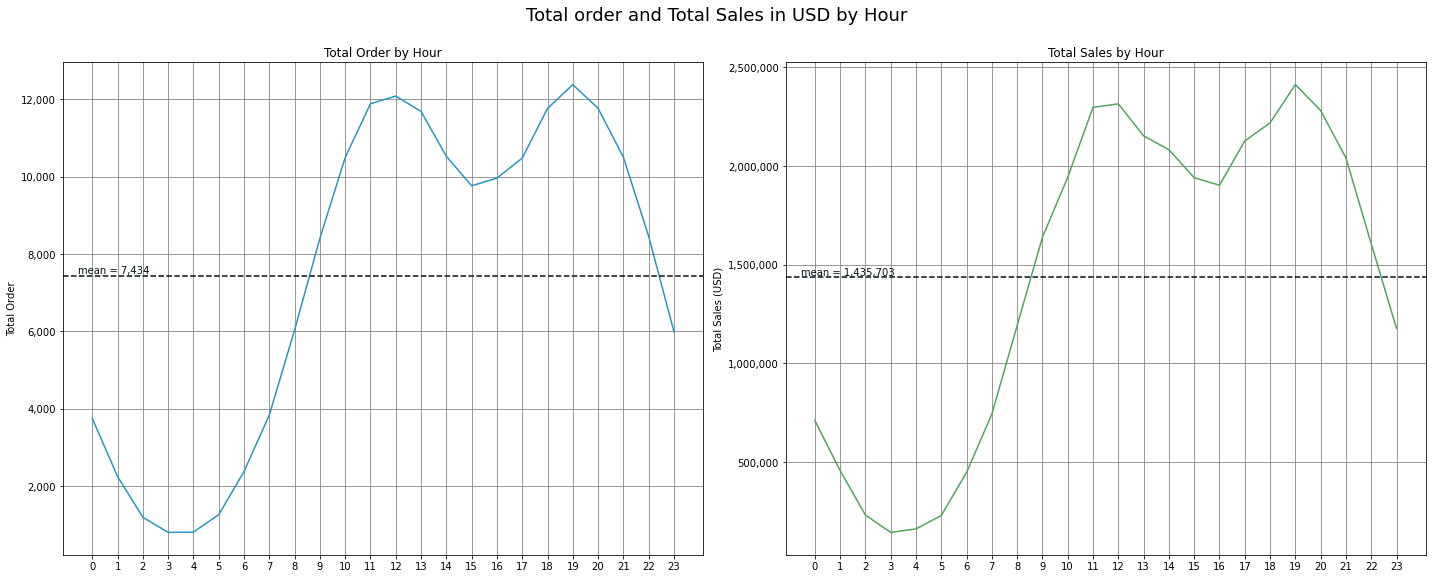

In [257]:
# Create line chart for total order and sales by hour

# Define subplot grid
fig, (ax0, ax1) = plt.subplots(1,2, figsize = [20,8], sharex=False)
fig.tight_layout()
fig.set_tight_layout(True)
fig.suptitle("Total order and Total Sales in USD by Hour", fontsize=18, y=1)
fig.subplots_adjust(top=1.5, hspace=.5, wspace=.5)

# Total order by hour
sns.lineplot(data = hour_data.sort_values('hour', ascending=True), x = 'hour', y = 'total_order', ax = ax0, color="#2596be")
ylab = ax0.set_ylabel('Total Order')
xlab = ax0.set_xlabel(None)
ax0.set_title('Total Order by Hour')
ax0.set_xticks(hour_data['hour'])
ax0.grid(color = "gray")
ax0.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax0.axhline(hour_data['total_order'].mean(), color = "#040f13", linestyle='--', label = "mean")
ax0.annotate('mean = ' + str(format(hour_data['total_order'].mean(), ',.0f')), xy = (ax0.get_xlim()[0]+0.6, hour_data['total_order'].mean()), ha = "left", va="bottom", color = "#040f13")

# Total sales by hour
sns.lineplot(data = hour_data.sort_values('hour', ascending=True), x = 'hour', y = 'total_sales', ax = ax1, color="#50a45e")
ylab = ax1.set_ylabel('Total Sales (USD)')
xlab = ax1.set_xlabel(None)
ax1.set_title('Total Sales by Hour')
ax1.set_xticks(hour_data['hour'])
ax1.grid(color = "gray")
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.axhline(hour_data['total_sales'].mean(), color = "#040f13", linestyle='--', label = "mean")
ax1.annotate('mean = ' + str(format(hour_data['total_sales'].mean(), ',.0f')), xy = (ax1.get_xlim()[0]+0.6, hour_data['total_sales'].mean()), ha = "left", va="bottom", color = "#040f13")

### Area with the highest number of sales or order

In [258]:
# Create subset of dataset without 2020-01 data
df_sub = df[df['year_month'] != '2020-01']

In [259]:
# Calculate total number of orders and sales by city and states
area_data = df_sub.groupby(by=['city_state'], as_index=False).agg(
    total_order = ('Order ID', pd.Series.nunique),
    total_sales = ('sales', sum),
    
)

area_data.sort_values('total_order', ascending=False).head(10)

,city_state,total_order,total_sales
8,"San Francisco, CA",42887,8252258.670
4,"Los Angeles, CA",28497,5447304.290
5,"New York City, NY",23840,4660526.520
2,"Boston, MA",19088,3657300.760
0,"Atlanta, GA",14253,2794199.070
3,"Dallas, TX",14238,2763659.010
9,"Seattle, WA",14118,2744896.030
7,"Portland, OR",9615,1869857.570
1,"Austin, TX",9507,1817544.350
6,"Portland, ME",2363,449321.380


Text(8.5, 3445686.7650000006, 'mean = 3,445,687')

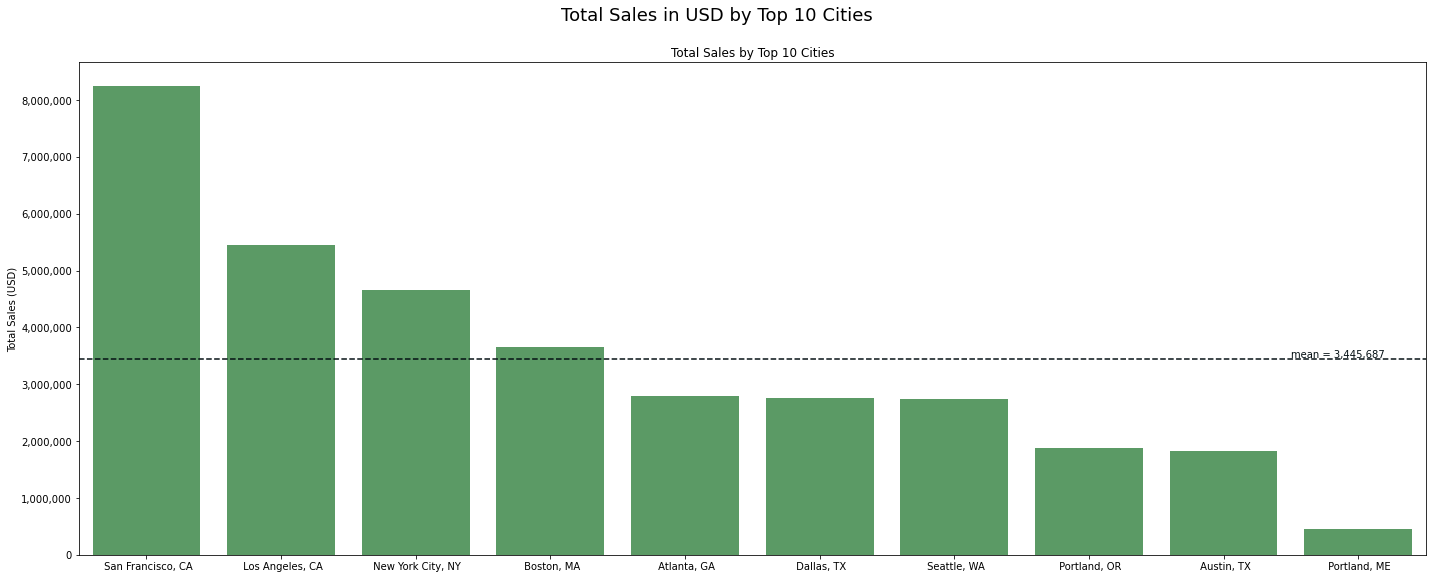

In [260]:
# Create bar chart for total sales by top 10 cities and its states

# Define subplot grid
fig, (ax0) = plt.subplots(1,1, figsize = [20,8], sharex=False)
fig.tight_layout()
fig.set_tight_layout(True)
fig.suptitle("Total Sales in USD by Top 10 Cities", fontsize=18, y=1)
fig.subplots_adjust(top=1.5, hspace=.5, wspace=.5)

# Total sales by top 10 cities
sns.barplot(data = area_data.sort_values('total_sales', ascending=False).head(10), x = 'city_state', y = 'total_sales', ax = ax0, color="#50a45e")
ylab = ax0.set_ylabel('Total Sales (USD)')
xlab = ax0.set_xlabel(None)
ax0.set_title('Total Sales by Top 10 Cities')
ax0.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax0.axhline(area_data['total_sales'].mean(), color = "#040f13", linestyle='--', label = "mean")
ax0.annotate('mean = ' + str(format(area_data['total_sales'].mean(), ',.0f')), xy = (ax0.get_xlim()[0]+9.0, area_data['total_sales'].mean()), ha = "left", va="bottom", color = "#040f13")

### Products with the highest overall number of order and sales

In [261]:
# Calculate total number of sales by product
product_data = df_sub.groupby(by=['Product'], as_index=False).agg(
    total_order = ('Order ID', pd.Series.nunique),
    total_sales = ('sales', sum),
    
)

product_data.sort_values('total_order', ascending=False).head()

,Product,total_order,total_sales
15,USB-C Charging Cable,21851,285927.650
12,Lightning Charging Cable,21599,346286.850
5,AAA Batteries (4-pack),20590,92633.190
4,AA Batteries (4-pack),20542,106041.600
17,Wired Headphones,18846,246034.800


In [262]:
product_data.sort_values('total_sales', ascending=False).head()

,Product,total_order,total_sales
13,Macbook Pro Laptop,4720,8030800.000
18,iPhone,6838,4791500.000
14,ThinkPad Laptop,4124,4125958.740
9,Google Phone,5521,3316800.000
1,27in 4K Gaming Monitor,6224,2432757.620


Text(-0.3, 1813519.3500000003, 'mean = 1,813,519')

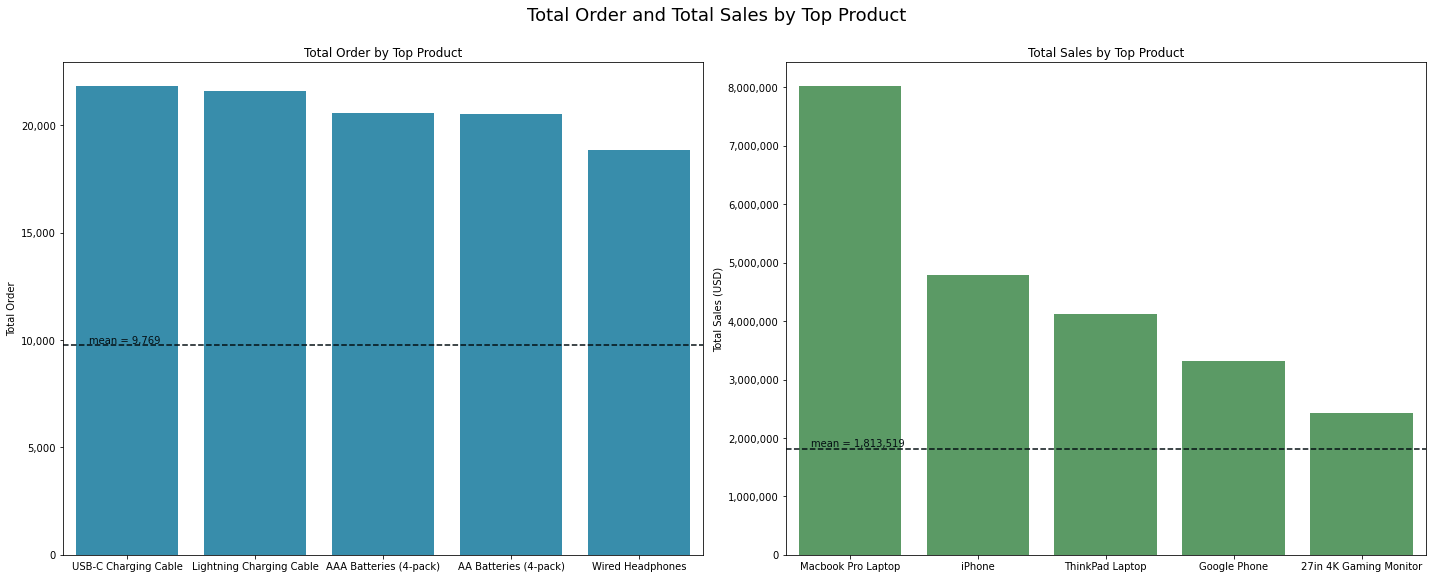

In [274]:
# Create bar chart for total order and total sales by top products

# Define subplot grid
fig, (ax0, ax1) = plt.subplots(1,2, figsize = [20,8], sharex=False)
fig.tight_layout()
fig.set_tight_layout(True)
fig.suptitle("Total Order and Total Sales by Top Product", fontsize=18, y=1)
fig.subplots_adjust(top=1.5, hspace=.5, wspace=.5)

# Total order by top product
sns.barplot(data = product_data.sort_values('total_order', ascending=False).head(), x = 'Product', y = 'total_order', ax = ax0, color="#2596be")
ylab = ax0.set_ylabel('Total Order')
xlab = ax0.set_xlabel(None)
ax0.set_title('Total Order by Top Product')
ax0.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax0.axhline(product_data['total_order'].mean(), color = "#040f13", linestyle='--', label = "mean")
ax0.annotate('mean = ' + str(format(product_data['total_order'].mean(), ',.0f')), xy = (ax0.get_xlim()[0]+0.2, product_data['total_order'].mean()), ha = "left", va="bottom", color = "#040f13")

# Total sales by top product
sns.barplot(data = product_data.sort_values('total_sales', ascending=False).head(), x = 'Product', y = 'total_sales', ax = ax1, color="#50a45e")
ylab = ax1.set_ylabel('Total Sales (USD)')
xlab = ax1.set_xlabel(None)
ax1.set_title('Total Sales by Top Product')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.axhline(product_data['total_sales'].mean(), color = "#040f13", linestyle='--', label = "mean")
ax1.annotate('mean = ' + str(format(product_data['total_sales'].mean(), ',.0f')), xy = (ax0.get_xlim()[0]+0.2, product_data['total_sales'].mean()), ha = "left", va="bottom", color = "#040f13")


#### Top 5 products in the top highest sales cities (SF, LA, NYC)

In [263]:
# Define top three cities with highest sales
top_cities = area_data.sort_values('total_sales', ascending=False)['city_state'].head(3).to_list()

In [264]:
# Determine top products by sales number in each city
product_city = df_sub.groupby(by=['city_state', 'Product'], as_index=False).agg(
    total_sales = ('sales', sum)
)

product_city = product_city.sort_values(['total_sales'], ascending=False)
    

##### Top 5 products for San Francisco

In [265]:
product_city[product_city['city_state'] == top_cities[0]].head(5)

,city_state,Product,total_sales
165,"San Francisco, CA",Macbook Pro Laptop,1929500.000
170,"San Francisco, CA",iPhone,1161300.000
166,"San Francisco, CA",ThinkPad Laptop,962990.370
161,"San Francisco, CA",Google Phone,813600.000
153,"San Francisco, CA",27in 4K Gaming Monitor,568605.420


##### Top 5 products for Los Angeles

In [266]:
product_city[product_city['city_state'] == top_cities[1]].head(5)

,city_state,Product,total_sales
89,"Los Angeles, CA",Macbook Pro Laptop,1275000.000
94,"Los Angeles, CA",iPhone,782600.000
90,"Los Angeles, CA",ThinkPad Laptop,638993.610
85,"Los Angeles, CA",Google Phone,508800.000
77,"Los Angeles, CA",27in 4K Gaming Monitor,391159.970


##### Top 5 products for New York City

In [267]:
product_city[product_city['city_state'] == top_cities[2]].head(5)

,city_state,Product,total_sales
108,"New York City, NY",Macbook Pro Laptop,1116900.000
113,"New York City, NY",iPhone,616000.000
109,"New York City, NY",ThinkPad Laptop,559994.400
104,"New York City, NY",Google Phone,454200.000
98,"New York City, NY",34in Ultrawide Monitor,329451.330


### Products that are oftenly sold together

In [268]:
# Identify column of the same order ID with multiple purchases
duplicate_df = df_sub[df_sub['Order ID'].duplicated(keep=False)].sort_values(['Order ID', 'Product'], ascending=True)

# Grouped products with the same order ID
duplicate_df['grouped_product'] = duplicate_df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
grouped_df = duplicate_df[['Order ID', 'grouped_product']].drop_duplicates()


In [269]:
# Calculate number of unique Order ID and total sales by grouped_product

grouped_product_data = grouped_df.groupby(by=['grouped_product'], as_index=False).agg(
    total_order = ('Order ID', pd.Series.nunique)
)

grouped_product_data.sort_values('total_order', ascending=False).head(10)

,grouped_product,total_order
191,"Lightning Charging Cable,iPhone",894
165,"Google Phone,USB-C Charging Cable",869
210,"Wired Headphones,iPhone",374
201,"USB-C Charging Cable,Vareebadd Phone",318
170,"Google Phone,Wired Headphones",311
128,"Apple Airpods Headphones,iPhone",298
131,"Bose SoundSport Headphones,Google Phone",169
206,"Vareebadd Phone,Wired Headphones",110
81,"AA Batteries (4-pack),Lightning Charging Cable",103
184,"Lightning Charging Cable,USB-C Charging Cable",96
